<a href="https://colab.research.google.com/github/sunmarknatecom/computer_vision/blob/master/ct_segmentationv06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 문자 인용은 C, C++의 규정을 따른다
### 문자 인용은 '' 를 사용: ex) 'a'
### 문자열 인용은 ""를 사용: ex) "ab"
### 변수명은 문자갯수가 4 조합

# PREPROCESSING

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## INSTALL THE REQUIRED MODULE

In [4]:
!pip install pydicom pynrrd

## IMPORT THE MODULES

In [5]:
# DATA PREPROCESSING
from glob import glob
import numpy as np
import pydicom, cv2, os
from pydicom.pixel_data_handlers.util import apply_modality_lut, apply_voi_lut
import matplotlib.pyplot as plt
from PIL import Image

# DEEP LEARNING MODULES
import tensorflow as tf
from keras import backend as K
from keras.losses import binary_crossentropy
from keras.optimizers import adam_v2

from keras.layers import Input, Conv2D, MaxPooling2D, Conv2DTranspose, BatchNormalization, concatenate
from keras.models import Model
from skimage.metrics import structural_similarity as ssim

In [16]:
from glob import glob
import cv2
import copy
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil

print("path example: seg_001/seg_001_1")
path = input("Path ? = ")

x1 = int(input('X1 ? = '))
x2 = int(input('X2 ? = '))
y1 = int(input('Y1 ? = '))
y2 = int(input('Y2 ? = '))
s1 = int(input('S1 ? = '))
s2 = int(input('S2 ? = '))

in_path = '/content/drive/MyDrive/segmentation/data/'+path+'/mask_test/*.png'
file_list = glob(in_path)


path example: seg_001/seg_001_1
Path ? = seg_002/seg_002_1
X1 ? = 185
X2 ? = 322
Y1 ? = 56
Y2 ? = 150
S1 ? = 39
S2 ? = 91


In [ ]:
file_list

In [19]:
for elem in file_list[s1-1:s2]:
    obj = cv2.imread(elem, cv2.IMREAD_UNCHANGED)
    file_name = os.path.basename(elem)
    temp_obj = copy.copy(obj)
    temp_obj[y1:y2, x1:x2] = 1
    # out_img = np.hstack((obj, temp_obj))
    # plt.imshow(out_img, cmap='gray')
    # plt.show()
    cv2.imwrite('/content/drive/MyDrive/segmentation/data/'+path+'/mask_unface/'+file_name, temp_obj)
    del temp_obj #, out_img
    # plt.close()
    
for elem in file_list[s2:]:
    file_name = os.path.basename(elem)
    shutil.copy(elem, '/content/drive/MyDrive/segmentation/data/'+path+'/mask_unface/')

if s1 != 1:
    for elem in file_list[:s1-1]:
        file_name = os.path.basename(elem)
        shutil.copy(elem, elem[:25]+'mask_unface/')
else:
    pass

In [21]:
file_name = glob('/content/drive/MyDrive/segmentation/data/'+path+'/mask_slicer/*.nrrd')

In [22]:
file_name

['/content/drive/MyDrive/segmentation/data/seg_002/seg_002_1/mask_slicer/seg_002_1_mask.nrrd']

In [20]:
path

'seg_002/seg_002_1'

In [10]:
file_name

[]

In [23]:
import nrrd


file_name = glob('/content/drive/MyDrive/segmentation/data/'+path+'/mask_slicer/*.nrrd')

temp_data, temp_header = nrrd.read(file_name[0], index_order='C')

ds = []

fl_png = glob('/content/drive/MyDrive/segmentation/data/'+path+'/mask_unface/*.png')

for i in range(len(fl_png)):
    temp_obj = Image.open(fl_png[-(i+1)])
    temp_obj = np.array(temp_obj)
    ds.append(temp_obj)
    del temp_obj
    
ds = np.array(ds)

nrrd.write('/content/drive/MyDrive/segmentation/data/'+path+'/mask_slicer/'+path[8:17]+'_did.nrrd', ds, temp_header, index_order='C')

## CREATE THE ROOT PATH

In [3]:
root_paths = []
error_paths = []

In [4]:
workspace_path = "/content/drive/MyDrive/segmentation/data/"

In [5]:
for pt_no in range(1,17): # After, use os.listdir
    pt_idx = "seg_%03d/"%pt_no
    for sr_no in range(1,3): # After, use os.listdir
        idx = "seg_%03d_%d/"%(pt_no,sr_no)
        path = workspace_path + pt_idx + idx
        if os.path.exists(path):
            if len(os.listdir(path+"dicom/")) == 0:
                error_paths.append(path)
            else:
                root_paths.append(path)
        else:
            error_paths.append(path)
            pass

In [6]:
for i, elem in enumerate(root_paths):
    print("IDX: %02d"%(i+1), elem)

IDX: 01 /content/drive/MyDrive/segmentation/data/seg_001/seg_001_1/
IDX: 02 /content/drive/MyDrive/segmentation/data/seg_001/seg_001_2/
IDX: 03 /content/drive/MyDrive/segmentation/data/seg_002/seg_002_1/
IDX: 04 /content/drive/MyDrive/segmentation/data/seg_002/seg_002_2/
IDX: 05 /content/drive/MyDrive/segmentation/data/seg_003/seg_003_1/
IDX: 06 /content/drive/MyDrive/segmentation/data/seg_003/seg_003_2/
IDX: 07 /content/drive/MyDrive/segmentation/data/seg_004/seg_004_1/
IDX: 08 /content/drive/MyDrive/segmentation/data/seg_005/seg_005_1/
IDX: 09 /content/drive/MyDrive/segmentation/data/seg_005/seg_005_2/
IDX: 10 /content/drive/MyDrive/segmentation/data/seg_006/seg_006_1/
IDX: 11 /content/drive/MyDrive/segmentation/data/seg_006/seg_006_2/
IDX: 12 /content/drive/MyDrive/segmentation/data/seg_007/seg_007_1/
IDX: 13 /content/drive/MyDrive/segmentation/data/seg_010/seg_010_1/
IDX: 14 /content/drive/MyDrive/segmentation/data/seg_012/seg_012_1/
IDX: 15 /content/drive/MyDrive/segmentation/data

In [7]:
for elem in root_paths:
    os.mkdir(elem+'mask_unface')

In [ ]:
for i, elem in enumerate(error_paths):
    print("IDX: %02d"%(i+1), elem)

IDX: 01 /content/drive/MyDrive/segmentation/data/seg_004/seg_004_2/
IDX: 02 /content/drive/MyDrive/segmentation/data/seg_007/seg_007_2/
IDX: 03 /content/drive/MyDrive/segmentation/data/seg_008/seg_008_1/
IDX: 04 /content/drive/MyDrive/segmentation/data/seg_008/seg_008_2/
IDX: 05 /content/drive/MyDrive/segmentation/data/seg_009/seg_009_1/
IDX: 06 /content/drive/MyDrive/segmentation/data/seg_009/seg_009_2/
IDX: 07 /content/drive/MyDrive/segmentation/data/seg_010/seg_010_2/
IDX: 08 /content/drive/MyDrive/segmentation/data/seg_011/seg_011_1/
IDX: 09 /content/drive/MyDrive/segmentation/data/seg_011/seg_011_2/
IDX: 10 /content/drive/MyDrive/segmentation/data/seg_015/seg_015_1/
IDX: 11 /content/drive/MyDrive/segmentation/data/seg_015/seg_015_2/


### 경로 설정 - 데이터와 레이블을 불러올 경로를 설정

In [ ]:
data_path = ['dicom/','image/','mask/','mask_slicer/','mask_test/','prediction/']

### 훈련 디렉토리와 빈 디렉토리를 저장할 리스트

In [ ]:
sel_paths = []

## SSIM을 통한 파일 선택

In [ ]:

# root = '/content/drive/MyDrive/segmentation/data/seg_001/seg_001_1/mask/'
# file_list = sorted(glob(root+'*.png'))

def create(path='/content/drive/MyDrive/segmentation/data/seg_002/seg_002_1/mask/'):
    '''
    ----------------------------------------
    Purpose: create the file list
    ----------------------------------------
    Usage:
    >> create(path)
    ----------------------------------------
    Input:
    path
    ----------------------------------------
    Output:
    list of image objects(numpy arrays)
    ----------------------------------------
    '''
    root = path
    file_list_2 = sorted(glob(root+'*.png'))
    frame_list = []
    for elem in file_list_2:
        temp_arr = cv2.imread(elem, cv2.IMREAD_UNCHANGED)
        temp_arr = temp_arr -1
        temp_arr = temp_arr * 255
        frame_list.append(temp_arr)
        del temp_arr
    return frame_list, file_list_2
def select(obj_list):
    '''
    ----------------------------------------
    Purpose: decrease the size of input data
    ----------------------------------------
    Usage:
    >> select(array_list)
    ----------------------------------------
    Input:
    list of image objects(numpy arrays)
    ----------------------------------------
    Output:
    list of selected files
    ----------------------------------------
    '''
    n = 0
    cumum = 0
    limit_num = 5
    log_record = []
    selected_file_number = []
    if obj_list != None:
        length = len(obj_list)-1
        for i in range(length):
            n = n + 1
            if i != 0:
                temp_1_obj = np.array(obj_list[i])
                temp_2_obj = np.array(obj_list[i+1])
                result_ssim = ssim(temp_1_obj, temp_2_obj, data_range=255)
                if n < limit_num:
                    if result_ssim < 0.96:
                        out_text = '>> %03d image was     selected. MSSIM = %02.4f: and n is %d. Cumumlative: %d'%(i,result_ssim,n, cumum)
                        print(out_text, end='\r')
                        log_record.append(out_text)
                        selected_file_number.append(i)
                        n = 0
                        cumum = cumum + 1
                    else:
                        out_text = '>> %03d image was not selected. MSSIM = %02.4f: and n is %d. Cumulative: %d'%(i,result_ssim, n, cumum)
                        print(out_text, end='\r')
                        log_record.append(out_text)
                else:
                    out_text = '>> %03d image was     selected. MSSIM = %02.4f: and n is %d. Cumulative: %d'%(i,result_ssim, n, cumum)
                    print(out_text, end='\r')
                    selected_file_number.append(i)
                    n = 0
                    cumum = cumum + 1
            else:
                pass
    else:
        pass
    print(selected_file_number)
    del length, n, temp_1_obj, temp_2_obj, cumum
    return selected_file_number

def save_list(fil_nme, selection_list, pfile_list):
    with open('/content/drive/MyDrive/segmentation/lst_pth/'+fil_nme+'.txt', 'w', encoding='UTF-8') as f:
        for i, line in enumerate(selection_list):
            f.write(str(pfile_list[line] + '\n'))

def main():
    for elem in root_paths:
        list_file = create(path=elem+'/mask_test/')
        # list_file = create()
        temp = select(list_file[0])
        save_list(elem.split('/')[-2], temp, list_file[1])
        del list_file, temp

In [ ]:
main()

[4, 9, 14, 19, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69, 74, 79, 84, 89, 94, 99, 104, 109, 114, 119, 124, 129, 134, 139, 144, 149, 154, 159, 164, 169, 174, 179, 184, 189, 194, 199, 204, 209, 214, 219, 224, 229, 234, 239, 244, 249, 254, 259, 264, 269, 274, 279, 284, 289, 294, 299, 304]
[4, 9, 14, 19, 24, 29, 34, 39, 44, 48, 50, 51, 54, 59, 64, 69, 74, 79, 84, 89, 94, 99, 104, 109, 114, 119, 124, 129, 134, 139, 144, 149, 154, 159, 164, 169, 174, 179, 184, 189, 194, 199, 204, 209, 214, 219, 224, 229, 234, 239, 244, 249, 254, 259, 264, 269, 274, 279, 284, 289, 294, 299, 304, 309, 314, 319, 324, 329, 334, 339, 344, 349, 354]
[4, 9, 14, 19, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69, 74, 79, 84, 89, 94, 99, 104, 109, 114, 119, 124, 129, 134, 139, 144, 149, 154, 159, 164, 169, 174, 179, 184, 189, 194, 199, 204, 209, 214, 219, 224, 229, 234, 239, 244, 249, 254, 259, 264, 269, 274, 279, 284, 289, 294, 299, 304, 309, 314, 319, 324, 329, 334, 339, 344, 349, 354]
[4, 9, 14, 19, 24, 29, 34, 39, 44, 49, 5

In [ ]:
text_file_list = glob('/content/drive/MyDrive/segmentation/lst_pth/*.txt')

In [ ]:
train_msks_path = []

In [ ]:
for elem in text_file_list[:-3]:
    file_objt = open(elem, 'r')
    for line in file_objt:
        train_msks_path.append(line.strip())
    file_objt.close()

In [ ]:
train_msks_path

In [ ]:
train_imgs_path = []

for elem in train_msks_path:
    temp_path = elem[:-31] + "dicom" + elem[-22:-11] + "dcm" + elem[-8:-3] + "dcm"
    train_imgs_path.append(temp_path)

In [ ]:
train_imgs_path

In [ ]:
valid_msks_path = []

for elem in text_file_list[-3:]:
    file_objt = open(elem, 'r')
    for line in file_objt:
        valid_msks_path.append(line.strip())
    file_objt.close()

valid_imgs_path = []

for elem in valid_msks_path:
    temp_path = elem[:-31] + "dicom" + elem[-22:-11] + "dcm" + elem[-8:-3] + "dcm"
    valid_imgs_path.append(temp_path)

## CREATE THE PATHS LISTS

### 

## CONFIRM THE PATHS

In [ ]:
print('Image numbers: ', len(train_imgs_path))
print('Masks numbers: ', len(train_msks_path))

Image numbers:  1164
Masks numbers:  1164


In [ ]:
print('Image numbers: ', len(valid_imgs_path))
print('Masks numbers: ', len(valid_msks_path))

Image numbers:  159
Masks numbers:  159


## CONFIRM THE GPU

In [ ]:
!nvidia-smi

Thu Apr  7 04:41:41 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    25W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
device_name = tf.test.gpu_device_name()

if device_name != '/device:GPU:0':
    raise SystemError("GPU device not found")
print("Found GPU at: {}".format(device_name))

Found GPU at: /device:GPU:0


## CREATE THE TRAIN DATA AND LABELS

In [ ]:
del train_imgs, train_msks

In [ ]:
train_imgs = []
for path in train_imgs_path:
    obj = pydicom.dcmread(path)
    arr = obj.pixel_array
    Max_val = np.max(arr)
    Min_val = np.min(arr)
    Up_arr = arr - Min_val
    Dn_arr = Max_val - Min_val
    nor_arr = Up_arr / Dn_arr
    train_imgs.append(nor_arr)
    del obj
train_imgs = np.array(train_imgs)
train_msks = []
for path in train_msks_path:
    temp_obj = Image.open(path)
    temp_arr = np.array(temp_obj)
    train_msks.append(temp_arr)
    del temp_obj
train_msks = np.array(train_msks)

In [ ]:
valid_imgs = []
for path in valid_imgs_path:
    obj = pydicom.dcmread(path)
    arr = obj.pixel_array
    Max_val = np.max(arr)
    Min_val = np.min(arr)
    Up_arr = arr - Min_val
    Dn_arr = Max_val - Min_val
    nor_arr = Up_arr / Dn_arr
    valid_imgs.append(nor_arr)
    del obj
valid_imgs = np.array(valid_imgs)
valid_msks = []
for path in valid_msks_path:
    temp_obj = Image.open(path)
    temp_arr = np.array(temp_obj)
    valid_msks.append(temp_arr)
    del temp_obj
valid_msks = np.array(valid_msks)

In [ ]:
train_msks = train_msks.astype(np.float32)
train_msks = np.reshape(train_msks, (*train_msks.shape, 1))
train_msks -= 1

In [ ]:
valid_msks = valid_msks.astype(np.float32)
valid_msks = np.reshape(valid_msks, (*valid_msks.shape, 1))
valid_msks -= 1

In [ ]:
# import numpy as np

# a = np.load('/content/drive/MyDrive/segmentation/data/train_imgs_comp.npz')
# b = np.load('/content/drive/MyDrive/segmentation/data/train_msks_comp.npz')

# a.files
# train_imgs = a['train_imgs']
# b.files
# train_msks = b['a']

## CONFIRM THE TRAIN DATA ND LABELS

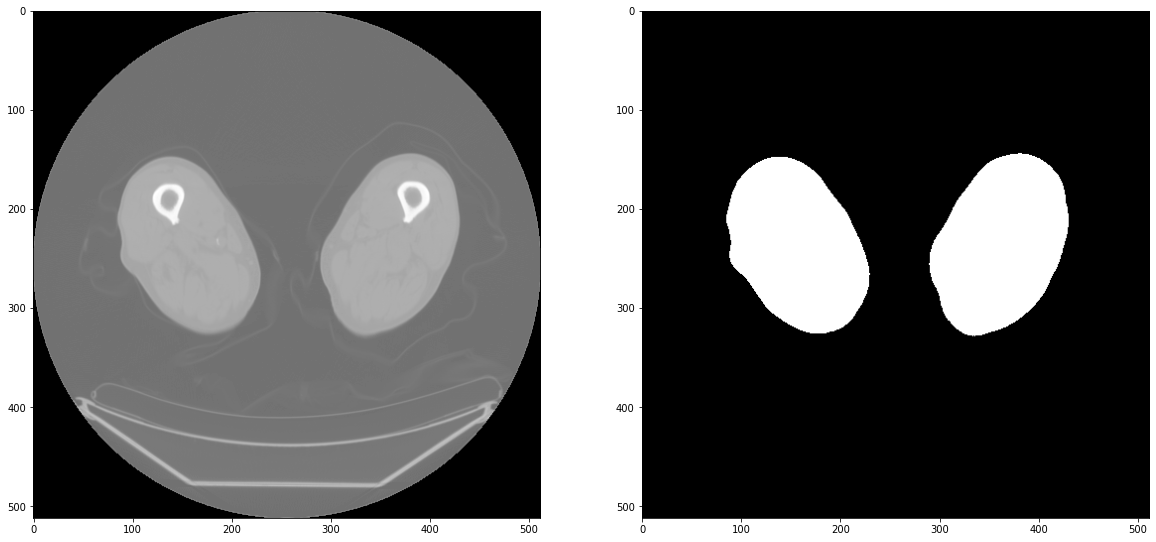

In [ ]:
%matplotlib inline

fig = plt.figure(0, figsize=(20, 20))
fig.add_subplot(1, 2, 1)
plt.imshow(train_imgs[700], cmap='gray')
fig.add_subplot(1, 2, 2)
plt.imshow(np.squeeze(train_msks[700]), cmap='gray')

# TENSORFLOW

## CONSTRUCT THE MODEL (U_NET)

In [ ]:
inputs = Input((512, 512, 1))
bnorm1 = BatchNormalization()(inputs)
conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(bnorm1)
conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool3)
conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool4)
conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv5)

up6 = concatenate([Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv5), conv4], axis=3)
conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(up6)
conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv6)

up7 = concatenate([Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv6), conv3], axis=3)
conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(up7)
conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv7)

up8 = concatenate([Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv7), conv2], axis=3)
conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(up8)
conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv8)

up9 = concatenate([Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(conv8), conv1], axis=3)
conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(up9)
conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv9)

conv10 = Conv2D(1, (1, 1), activation='sigmoid')(conv9)

model = Model(inputs=[inputs], outputs=[conv10])

## CUSTOM OBJECTS

In [ ]:
import tensorflow as tf
import keras.backend as K
from keras.losses import binary_crossentropy

beta = 0.25
alpha = 0.25
gamma = 2
epsilon = 1e-5
smooth = 1


class Semantic_loss_functions(object):
    def __init__(self):
        print ("semantic loss functions initialized")

    def dice_coef(self, y_true, y_pred):
        y_true_f = K.flatten(y_true)
        y_pred_f = K.flatten(y_pred)
        intersection = K.sum(y_true_f * y_pred_f)
        return (2. * intersection + K.epsilon()) / (K.sum(y_true_f) + K.sum(y_pred_f) + K.epsilon())

    def sensitivity(self, y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        return true_positives / (possible_positives + K.epsilon())

    def specificity(self, y_true, y_pred):
        true_negatives = K.sum(K.round(K.clip((1 - y_true) * (1 - y_pred), 0, 1)))
        possible_negatives = K.sum(K.round(K.clip(1 - y_true, 0, 1)))
        return true_negatives / (possible_negatives + K.epsilon())

    def convert_to_logits(self, y_pred):
        y_pred = tf.clip_by_value(y_pred, tf.keras.backend.epsilon(), 1 - tf.keras.backend.epsilon())
        return tf.math.log(y_pred / (1 - y_pred))

    def weighted_cross_entropyloss(self, y_true, y_pred):
        y_pred = self.convert_to_logits(y_pred)
        pos_weight = beta / (1 - beta)
        loss = tf.nn.weighted_cross_entropy_with_logits(logits=y_pred, targets=y_true, pos_weight=pos_weight)
        return tf.reduce_mean(loss)

    def focal_loss_with_logits(self, logits, targets, alpha, gamma, y_pred):
        weight_a = alpha * (1 - y_pred) ** gamma * targets
        weight_b = (1 - alpha) * y_pred ** gamma * (1 - targets)
        return (tf.math.log1p(tf.exp(-tf.abs(logits))) + tf.nn.relu(-logits)) * (weight_a + weight_b) + logits * weight_b

    def focal_loss(self, y_true, y_pred):
        y_pred = tf.clip_by_value(y_pred, tf.keras.backend.epsilon(), 1 - tf.keras.backend.epsilon())
        logits = tf.math.log(y_pred / (1 - y_pred))
        loss = self.focal_loss_with_logits(logits=logits, targets=y_true, alpha=alpha, gamma=gamma, y_pred=y_pred)
        return tf.reduce_mean(loss)

    def depth_softmax(self, matrix):
        sigmoid = lambda x: 1 / (1 + K.exp(-x))
        sigmoided_matrix = sigmoid(matrix)
        softmax_matrix = sigmoided_matrix / K.sum(sigmoided_matrix, axis=0)
        return softmax_matrix

    def generalized_dice_coefficient(self, y_true, y_pred):
        smooth = 1.
        y_true_f = K.flatten(y_true)
        y_pred_f = K.flatten(y_pred)
        intersection = K.sum(y_true_f * y_pred_f)
        score = (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)
        return score

    def dice_loss(self, y_true, y_pred):
        loss = 1 - self.generalized_dice_coefficient(y_true, y_pred)
        return loss

    def bce_dice_loss(self, y_true, y_pred):
        loss = binary_crossentropy(y_true, y_pred) + self.dice_loss(y_true, y_pred)
        return loss / 2.0

    def confusion(self, y_true, y_pred):
        smooth = 1
        y_pred_pos = K.clip(y_pred, 0, 1)
        y_pred_neg = 1 - y_pred_pos
        y_pos = K.clip(y_true, 0, 1)
        y_neg = 1 - y_pos
        tp = K.sum(y_pos * y_pred_pos)
        fp = K.sum(y_neg * y_pred_pos)
        fn = K.sum(y_pos * y_pred_neg)
        prec = (tp + smooth) / (tp + fp + smooth)
        recall = (tp + smooth) / (tp + fn + smooth)
        return prec, recall

    def true_positive(self, y_true, y_pred):
        smooth = 1
        y_pred_pos = K.round(K.clip(y_pred, 0, 1))
        y_pos = K.round(K.clip(y_true, 0, 1))
        tp = (K.sum(y_pos * y_pred_pos) + smooth) / (K.sum(y_pos) + smooth)
        return tp

    def true_negative(self, y_true, y_pred):
        smooth = 1
        y_pred_pos = K.round(K.clip(y_pred, 0, 1))
        y_pred_neg = 1 - y_pred_pos
        y_pos = K.round(K.clip(y_true, 0, 1))
        y_neg = 1 - y_pos
        tn = (K.sum(y_neg * y_pred_neg) + smooth) / (K.sum(y_neg) + smooth)
        return tn

    def tversky_index(self, y_true, y_pred):
        y_true_pos = K.flatten(y_true)
        y_pred_pos = K.flatten(y_pred)
        true_pos = K.sum(y_true_pos * y_pred_pos)
        false_neg = K.sum(y_true_pos * (1 - y_pred_pos))
        false_pos = K.sum((1 - y_true_pos) * y_pred_pos)
        alpha = 0.7
        return (true_pos + smooth) / (true_pos + alpha * false_neg + (1 - alpha) * false_pos + smooth)

    def tversky_loss(self, y_true, y_pred):
        return 1 - self.tversky_index(y_true, y_pred)

    def focal_tversky(self, y_true, y_pred):
        pt_1 = self.tversky_index(y_true, y_pred)
        gamma = 0.75
        return K.pow((1 - pt_1), gamma)

    def log_cosh_dice_loss(self, y_true, y_pred):
        x = self.dice_loss(y_true, y_pred)
        return tf.math.log((tf.exp(x) + tf.exp(-x)) / 2.0)

In [ ]:
# Reference
# https://www.sciencedirect.com/science/article/pii/S2665963821000269
# https://github.com/SoftwareImpacts/SIMPAC-2021-46

import tensorflow as tf
import keras.backend as K
from keras.losses import binary_crossentropy

beta = 0.25
alpha = 0.25
gamma = 2
epsilon = 1e-5
smooth = 1

def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + K.epsilon()) / (K.sum(y_true_f) + K.sum(y_pred_f) + K.epsilon())

def generalized_dice_coefficient(y_true, y_pred):
    smooth = 1.
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    score = (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)
    return score

def dice_loss(y_true, y_pred):
    loss = 1 - generalized_dice_coefficient(y_true, y_pred)
    return loss

def bce_dice_loss(y_true, y_pred):
    loss = binary_crossentropy(y_true, y_pred) + dice_loss(y_true, y_pred)
    return loss / 2.0

## COMPILE

In [ ]:
model.compile(adam_v2.Adam(learning_rate=1e-4), bce_dice_loss, metrics=[binary_crossentropy, generalized_dice_coefficient])

## TRAIN(FIT)

In [ ]:
model.fit(train_imgs, train_msks, batch_size=6, epochs=10, validation_data=(valid_imgs, valid_msks))

Epoch 1/10
194/194 [==============================] - 58s 235ms/step - loss: 0.3395 - binary_crossentropy: 0.3324 - generalized_dice_coefficient: 0.6534 - val_loss: 0.6627 - val_binary_crossentropy: 0.7297 - val_generalized_dice_coefficient: 0.4036
Epoch 2/10
194/194 [==============================] - 45s 229ms/step - loss: 0.2011 - binary_crossentropy: 0.2047 - generalized_dice_coefficient: 0.8026 - val_loss: 0.2204 - val_binary_crossentropy: 0.1946 - val_generalized_dice_coefficient: 0.7534
Epoch 3/10
194/194 [==============================] - 44s 229ms/step - loss: 0.0862 - binary_crossentropy: 0.0896 - generalized_dice_coefficient: 0.9173 - val_loss: 0.2354 - val_binary_crossentropy: 0.2620 - val_generalized_dice_coefficient: 0.7918
Epoch 4/10
194/194 [==============================] - 45s 230ms/step - loss: 0.0416 - binary_crossentropy: 0.0431 - generalized_dice_coefficient: 0.9598 - val_loss: 0.0506 - val_binary_crossentropy: 0.0441 - val_generalized_dice_coefficient: 0.9433
Epoc

## SAVE THE TRAINED MODEL

In [ ]:
model.save('my_model_3.h5')

## MODEL VIEW

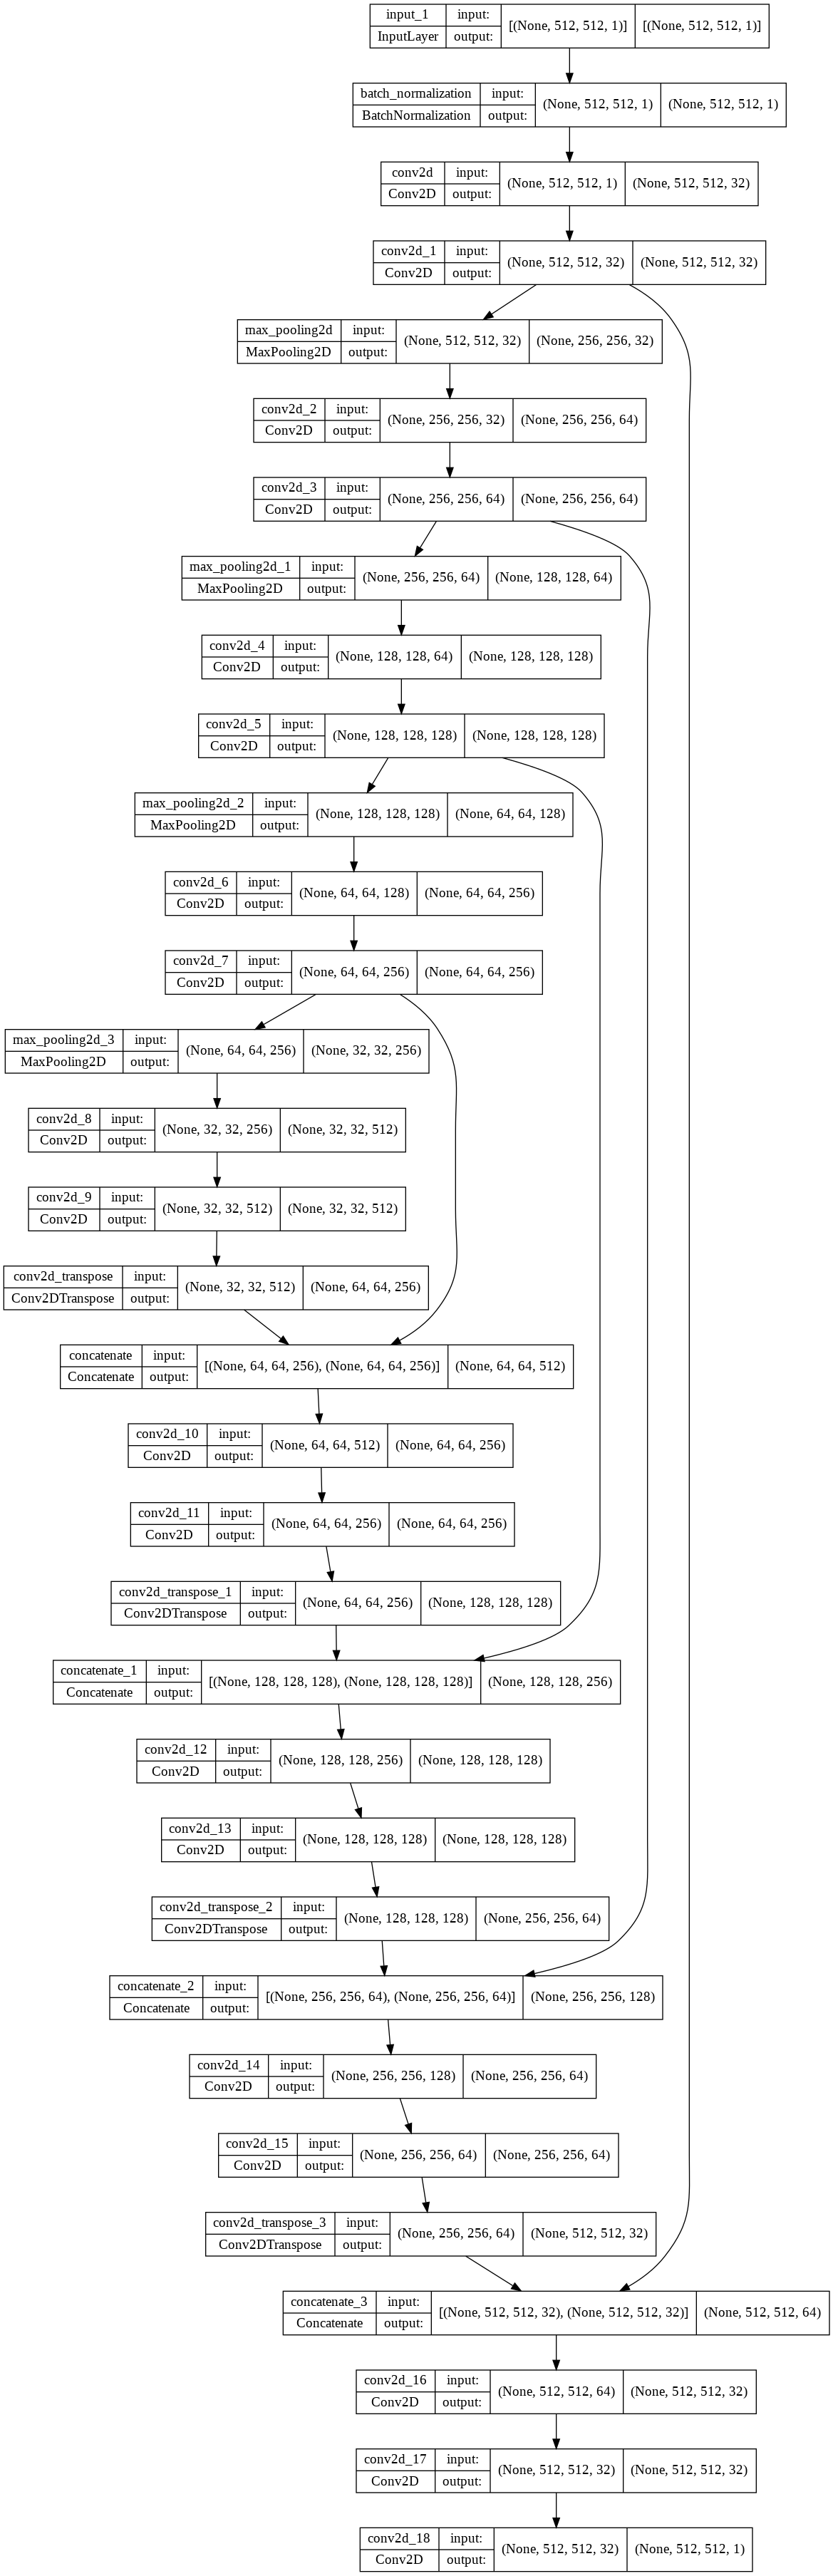

In [ ]:
tf.keras.utils.plot_model(model,show_shapes=True)

In [ ]:
print(model.history.history)

TypeError: ignored

In [ ]:
model.history.history['bce_dice_loss']

KeyError: ignored

In [ ]:
loss = model.history.history['loss']

KeyError: ignored

In [ ]:
val_loss = model.history.history['val_loss']

KeyError: ignored

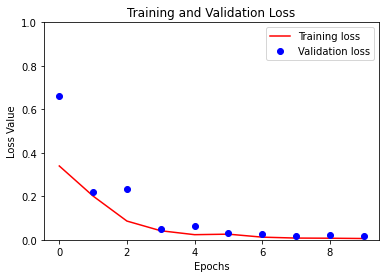

In [ ]:
epochs = range(10)

import matplotlib.pyplot as plt

plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'bo', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.ylim([0, 1])
plt.legend()
plt.show()

In [ ]:
train_imgs[1]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
train_imgs[1].max()

1.0

In [ ]:
train_imgs[1].min()

0.0

In [ ]:
type(train_imgs[1])

numpy.ndarray

## LOAD THE SAVED MODEL

In [ ]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/segmentation/my_model_3.h5',custom_objects={'bce_dice_loss': bce_dice_loss,'generalized_dice_coefficient': generalized_dice_coefficient} )

In [ ]:
val_loss

[0.6626728773117065,
 0.22035452723503113,
 0.23536120355129242,
 0.05059905722737312,
 0.061391644179821014,
 0.03068089298903942,
 0.026920514181256294,
 0.01796587184071541,
 0.020082978531718254,
 0.01840030774474144]

In [ ]:
new_model.variables[10]

<tf.Variable 'conv2d_3/kernel:0' shape=(3, 3, 64, 64) dtype=float32, numpy=
array([[[[-0.01104455,  0.03655315, -0.00636588, ..., -0.00592034,
           0.05398761,  0.06508172],
         [-0.03101654, -0.02640489, -0.06984399, ..., -0.03272272,
           0.04936585, -0.04094685],
         [ 0.02299531,  0.03673644,  0.05864556, ..., -0.06599463,
           0.03756672,  0.05974183],
         ...,
         [-0.02704668, -0.05902155,  0.05361281, ...,  0.00964891,
           0.0727152 ,  0.04381955],
         [ 0.06081483,  0.06208741, -0.02745816, ...,  0.02297536,
           0.00346905, -0.00221796],
         [ 0.0059637 ,  0.02160623, -0.04697302, ..., -0.01241418,
           0.00735823,  0.01630002]],

        [[-0.06188156,  0.01119879,  0.06105249, ...,  0.05199564,
          -0.02154442, -0.04933621],
         [-0.04915347, -0.05461632, -0.01882896, ...,  0.06122929,
          -0.04081601,  0.01107083],
         [ 0.04078681,  0.04715734,  0.02116137, ..., -0.06013084,
         

In [ ]:
a = new_model.variables[10]

In [ ]:
b = a.numpy()

In [ ]:
sum = 0

for i in b[0][0][0]:
    i = ++i

print(i)


0.06508172


In [ ]:
file_list = sorted(glob(root+idx_path+data_path[1]+'*.jpg'))
predic = []

predic = train_imgs[:10]

for elem in file_list:
    img_obj = cv2.imread(elem, cv2.IMREAD_UNCHANGED)
    predic.append(img_obj)

prediction = np.array(predic)

In [ ]:
predictions = np.array(train_imgs[:10])

In [ ]:
pred_imgs = []

def normalize_conf(input_arr):
    Max_val = np.max(input_arr)
    Min_val = np.min(input_arr)
    Up_arr = input_arr - Min_val
    Dn_arr = Max_val - Min_val
    normal_arr = Up_arr / Dn_arr
    return normal_arr

for i in range(1, 357):
    temp_pred = pydicom.dcmread('/content/drive/MyDrive/segmentation/data/seg_005/seg_005_1/dicom/seg_005_1_dcm_%03d.dcm'%i)
    temp_arry = temp_pred.pixel_array
    temp_norm = normalize_conf(temp_arry)
    pred_imgs.append(temp_norm)

pred_imgs = np.array(pred_imgs)

In [ ]:
predictions = train_imgs[:100]

## PREDICT

In [ ]:
pred_img = model.predict(predictions)

In [ ]:
trut_msk = train_msks[:100]

In [ ]:
dice_coef(pred_img[0],trut_msk[0])

<tf.Tensor: shape=(), dtype=float32, numpy=0.98880726>

In [ ]:
dice_coef(pred_img[10], trut_msk[10])

<tf.Tensor: shape=(), dtype=float32, numpy=0.9959628>

In [ ]:
plt_imgs = np.squeeze(pred_img)

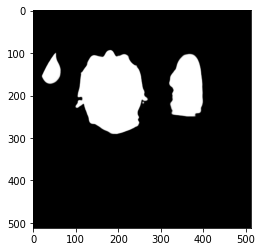

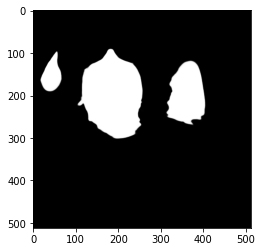

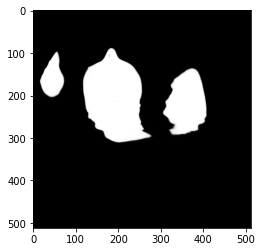

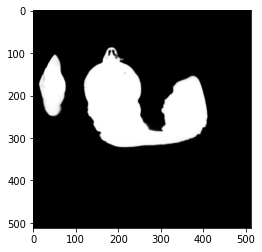

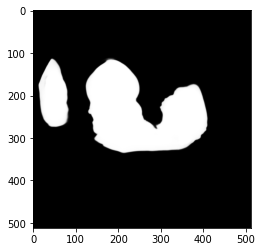

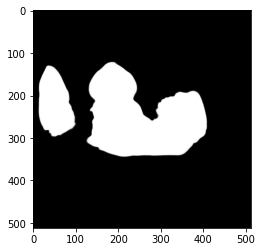

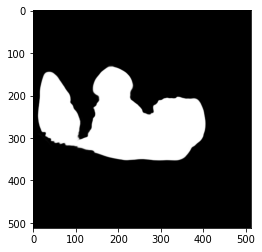

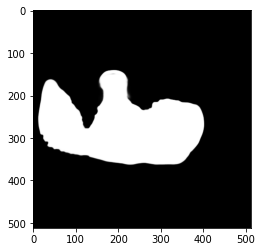

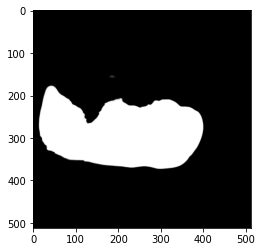

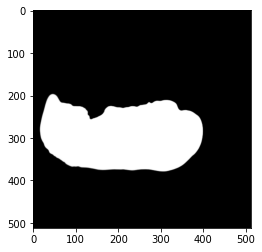

In [ ]:
for elem in plt_imgs:
    plt.imshow(elem, cmap='gray')
    plt.show()

In [ ]:
for i in range(100):
    fig = plt.figure(0, figsize=(10, 10))
    fig.add_subplot(1, 2, 1)
    plt.imshow(pred_imgs[i], cmap='gray')
    fig.add_subplot(1, 2, 2)
    plt.imshow(np.squeeze(plt_imgs[i]), cmap='gray')
    plt.show()

In [ ]:
plt_img = np.squeeze(pred_img[0])

In [ ]:
# https://github.com/shruti-jadon/Semantic-Segmentation-Loss-Functions/blob/master/loss_functions.py

import tensorflow as tf
import keras.backend as K
from keras.losses import binary_crossentropy

beta = 0.25
alpha = 0.25
gamma = 2
epsilon = 1e-5
smooth = 1


class Semantic_loss_functions(object):
    def __init__(self):
        print ("semantic loss functions initialized")

    def dice_coef(self, y_true, y_pred):
        y_true_f = K.flatten(y_true)
        y_pred_f = K.flatten(y_pred)
        intersection = K.sum(y_true_f * y_pred_f)
        return (2. * intersection + K.epsilon()) / (
                    K.sum(y_true_f) + K.sum(y_pred_f) + K.epsilon())

    def sensitivity(self, y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        return true_positives / (possible_positives + K.epsilon())

    def specificity(self, y_true, y_pred):
        true_negatives = K.sum(
            K.round(K.clip((1 - y_true) * (1 - y_pred), 0, 1)))
        possible_negatives = K.sum(K.round(K.clip(1 - y_true, 0, 1)))
        return true_negatives / (possible_negatives + K.epsilon())

    def convert_to_logits(self, y_pred):
        y_pred = tf.clip_by_value(y_pred, tf.keras.backend.epsilon(),
                                  1 - tf.keras.backend.epsilon())
        return tf.math.log(y_pred / (1 - y_pred))

    def weighted_cross_entropyloss(self, y_true, y_pred):
        y_pred = self.convert_to_logits(y_pred)
        pos_weight = beta / (1 - beta)
        loss = tf.nn.weighted_cross_entropy_with_logits(logits=y_pred,
                                                        targets=y_true,
                                                        pos_weight=pos_weight)
        return tf.reduce_mean(loss)

    def focal_loss_with_logits(self, logits, targets, alpha, gamma, y_pred):
        weight_a = alpha * (1 - y_pred) ** gamma * targets
        weight_b = (1 - alpha) * y_pred ** gamma * (1 - targets)

        return (tf.math.log1p(tf.exp(-tf.abs(logits))) + tf.nn.relu(
            -logits)) * (weight_a + weight_b) + logits * weight_b

    def focal_loss(self, y_true, y_pred):
        y_pred = tf.clip_by_value(y_pred, tf.keras.backend.epsilon(),
                                  1 - tf.keras.backend.epsilon())
        logits = tf.math.log(y_pred / (1 - y_pred))

        loss = self.focal_loss_with_logits(logits=logits, targets=y_true,
                                      alpha=alpha, gamma=gamma, y_pred=y_pred)

        return tf.reduce_mean(loss)

    def depth_softmax(self, matrix):
        sigmoid = lambda x: 1 / (1 + K.exp(-x))
        sigmoided_matrix = sigmoid(matrix)
        softmax_matrix = sigmoided_matrix / K.sum(sigmoided_matrix, axis=0)
        return softmax_matrix

    def generalized_dice_coefficient(self, y_true, y_pred):
        smooth = 1.
        y_true_f = K.flatten(y_true)
        y_pred_f = K.flatten(y_pred)
        intersection = K.sum(y_true_f * y_pred_f)
        score = (2. * intersection + smooth) / (
                    K.sum(y_true_f) + K.sum(y_pred_f) + smooth)
        return score

    def dice_loss(self, y_true, y_pred):
        loss = 1 - self.generalized_dice_coefficient(y_true, y_pred)
        return loss

    def bce_dice_loss(self, y_true, y_pred):
        loss = binary_crossentropy(y_true, y_pred) + \
               self.dice_loss(y_true, y_pred)
        return loss / 2.0

    def confusion(self, y_true, y_pred):
        smooth = 1
        y_pred_pos = K.clip(y_pred, 0, 1)
        y_pred_neg = 1 - y_pred_pos
        y_pos = K.clip(y_true, 0, 1)
        y_neg = 1 - y_pos
        tp = K.sum(y_pos * y_pred_pos)
        fp = K.sum(y_neg * y_pred_pos)
        fn = K.sum(y_pos * y_pred_neg)
        prec = (tp + smooth) / (tp + fp + smooth)
        recall = (tp + smooth) / (tp + fn + smooth)
        return prec, recall

    def true_positive(self, y_true, y_pred):
        smooth = 1
        y_pred_pos = K.round(K.clip(y_pred, 0, 1))
        y_pos = K.round(K.clip(y_true, 0, 1))
        tp = (K.sum(y_pos * y_pred_pos) + smooth) / (K.sum(y_pos) + smooth)
        return tp

    def true_negative(self, y_true, y_pred):
        smooth = 1
        y_pred_pos = K.round(K.clip(y_pred, 0, 1))
        y_pred_neg = 1 - y_pred_pos
        y_pos = K.round(K.clip(y_true, 0, 1))
        y_neg = 1 - y_pos
        tn = (K.sum(y_neg * y_pred_neg) + smooth) / (K.sum(y_neg) + smooth)
        return tn

    def tversky_index(self, y_true, y_pred):
        y_true_pos = K.flatten(y_true)
        y_pred_pos = K.flatten(y_pred)
        true_pos = K.sum(y_true_pos * y_pred_pos)
        false_neg = K.sum(y_true_pos * (1 - y_pred_pos))
        false_pos = K.sum((1 - y_true_pos) * y_pred_pos)
        alpha = 0.7
        return (true_pos + smooth) / (true_pos + alpha * false_neg + (
                    1 - alpha) * false_pos + smooth)

    def tversky_loss(self, y_true, y_pred):
        return 1 - self.tversky_index(y_true, y_pred)

    def focal_tversky(self, y_true, y_pred):
        pt_1 = self.tversky_index(y_true, y_pred)
        gamma = 0.75
        return K.pow((1 - pt_1), gamma)

    def log_cosh_dice_loss(self, y_true, y_pred):
        x = self.dice_loss(y_true, y_pred)
        return tf.math.log((tf.exp(x) + tf.exp(-x)) / 2.0)

In [ ]:
a =  Semantic_loss_functions()

semantic loss functions initialized


In [ ]:
b = a.dice_loss(pred_img[0],trut_msk[0])

In [ ]:
c = a.dice_coef(pred_img[0],trut_msk[0])
print(c.numpy())

0.9888071


In [ ]:
b.numpy()

0.011192739

In [ ]:
(b+c).numpy()

0.9999998

In [ ]:
dir(Semantic_loss_functions())

semantic loss functions initialized


['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'bce_dice_loss',
 'confusion',
 'convert_to_logits',
 'depth_softmax',
 'dice_coef',
 'dice_loss',
 'focal_loss',
 'focal_loss_with_logits',
 'focal_tversky',
 'generalized_dice_coefficient',
 'log_cosh_dice_loss',
 'sensitivity',
 'specificity',
 'true_negative',
 'true_positive',
 'tversky_index',
 'tversky_loss',
 'weighted_cross_entropyloss']

In [ ]:
d = a.tversky_index(pred_img[0],trut_msk[0])
print(d.numpy())

0.9896563


In [ ]:
plt_img[plt_img < 0.5] = 0

In [ ]:
plt_img[plt_img >= 0.5] = 1

In [ ]:
plt.imshow(plt_img, cmap='gray')

In [ ]:
for i, img in enumerate(temp_pred):
    path_ = '/content/drive/MyDrive/segmentation/data/seg_006/mask/mask_1-%03d.png'%(i+1)
    img = img * 255
    cv2.imwrite(path_, img)
    plt.imshow(img)
    plt.show()

In [ ]:
temp_2_pred = []

for elem in temp_pred:
    elem[elem<0.5] = 0
    elem[elem>=0.5] = 1
    elem.astype('uint8')
    temp_2_pred.append(elem)

# PREDICT BY THE LOADED MODEL

### 주의: 모듈을 먼저 임포트 하시오.

In [ ]:
SMOOTH = 1.

def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + SMOOTH) / (K.sum(y_true_f) + K.sum(y_pred_f) + SMOOTH)

def bce_dice_loss(y_true, y_pred):
    return 0.5 * binary_crossentropy(y_true, y_pred) - dice_coef(y_true, y_pred)

In [ ]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/segmentation/my_model.h5',custom_objects={'bce_dice_loss': bce_dice_loss,'dice_coef': dice_coef} )

In [ ]:
pred_imgs = []

def normalize_conf(input_arr):
    Max_val = np.max(input_arr)
    Min_val = np.min(input_arr)
    Up_arr = input_arr - Min_val
    Dn_arr = Max_val - Min_val
    normal_arr = Up_arr / Dn_arr
    return normal_arr

for i in range(1, 357):
    temp_pred = pydicom.dcmread('/content/drive/MyDrive/segmentation/data/seg_005/seg_005_1/dicom/seg_005_1_dcm_%03d.dcm'%i)
    temp_arry = temp_pred.pixel_array
    temp_norm = normalize_conf(temp_arry)
    pred_imgs.append(temp_norm)

pred_imgs = np.array(pred_imgs)

predictions = np.expand_dims(pred_imgs, axis=3)

In [ ]:
pred_img = new_model.predict(predictions)

plt_imgs = np.squeeze(pred_img)

for elem in plt_imgs:
    plt.imshow(elem, cmap='gray')
    plt.show()

In [ ]:
plt_imgs[plt_imgs < 0.5] = 0
plt_imgs[plt_imgs >= 0.5] = 1

In [ ]:
plt_imgs = np.array(plt_imgs, dtype='uint8')

In [ ]:
for i in range(100):
    fig = plt.figure(0, figsize=(10, 10))
    fig.add_subplot(1, 2, 1)
    plt.imshow(pred_imgs[i], cmap='gray')
    fig.add_subplot(1, 2, 2)
    plt.imshow(np.squeeze(plt_imgs[i]), cmap='gray')
    plt.show()

### TO DO LIST

1.   폐 윈도우 변환 후 노멀라이즈
2.   모델 저장
3.   



In [ ]:
np.unique(plt_imgs)

array([0, 1], dtype=uint8)

### NRRD 파일 변환

In [ ]:
!pip install pynrrd

In [ ]:
import nrrd

In [ ]:
data, header = nrrd.read('/content/drive/MyDrive/segmentation/data/seg_017/seg_017_1/mask_slicer/seg_017_1_mask.nrrd', index_order = 'C')

In [ ]:
obj_1 = data[0]

In [ ]:
np.unique(obj_1)

array([0, 1], dtype=int16)

In [ ]:
pred_imgs = glob('/content/drive/MyDrive/segmentation/data/seg_017/seg_017_1/dicom/*.dcm')

In [ ]:
pred_arr = []

for elem in pred_imgs:
    temp_obj = pydicom.dcmread(elem)
    arr = temp_obj.pixel_array
    Max_val = np.max(arr)
    Min_val = np.min(arr)
    Up_arr = arr - Min_val
    Dn_arr = Max_val - Min_val
    nor_arr = Up_arr / Dn_arr
    pred_arr.append(nor_arr)
    del temp_obj, arr, Up_arr, nor_arr

In [ ]:
np.shape(pred_arr)

(239, 512, 512)

In [ ]:
predictions = np.expand_dims(pred_arr, axis=3)

In [ ]:
pred_imgs = model.predict(predictions)

In [ ]:
np.shape(pred_imgs)

(239, 512, 512, 1)

In [ ]:
plt_imgs = np.squeeze(pred_imgs)

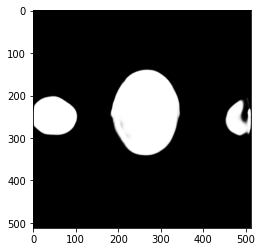

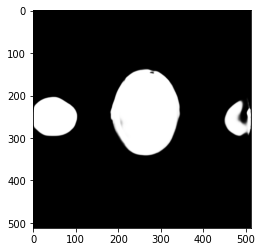

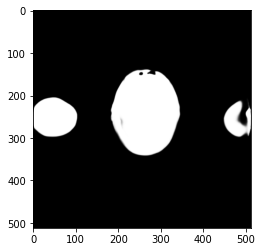

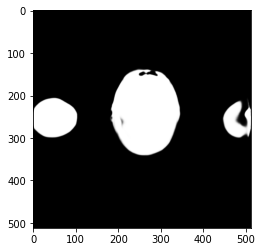

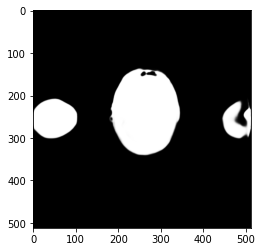

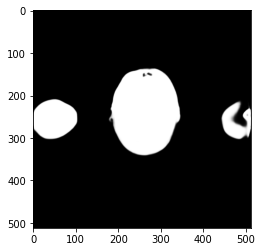

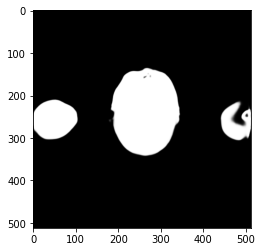

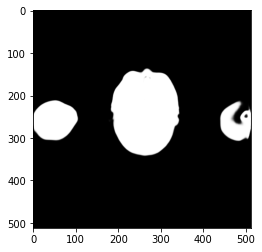

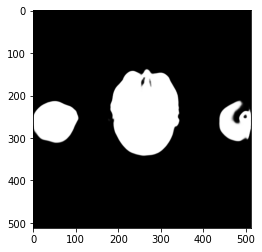

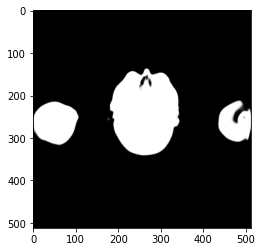

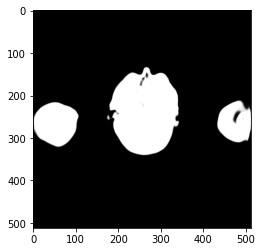

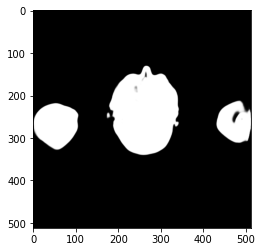

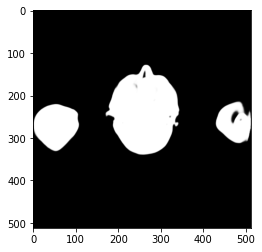

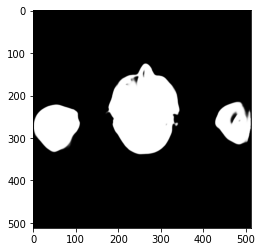

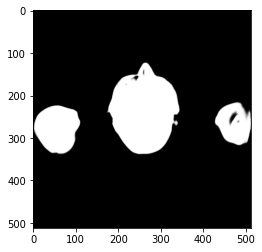

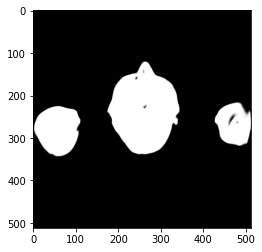

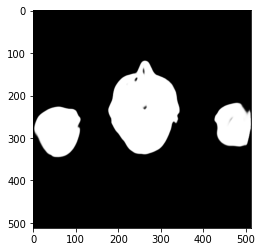

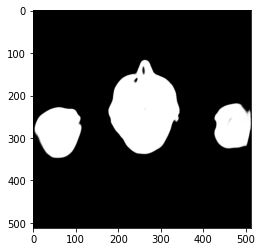

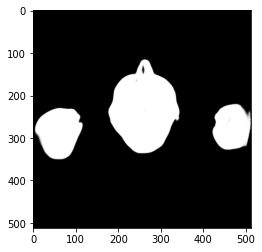

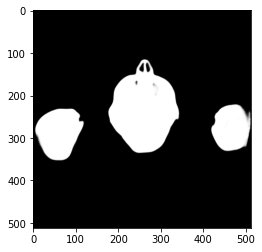

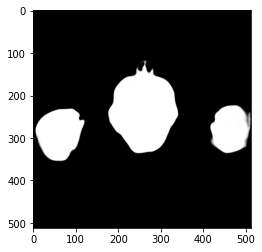

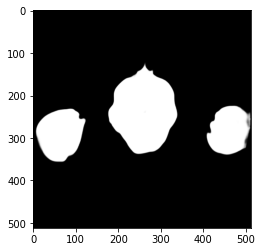

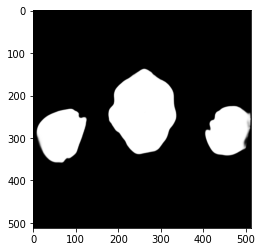

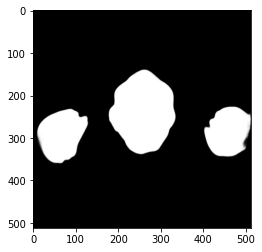

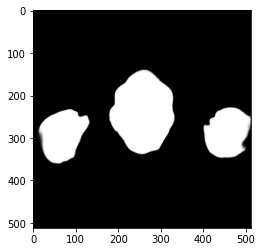

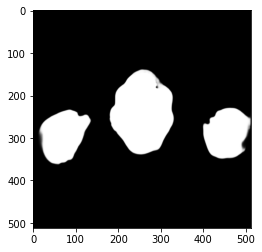

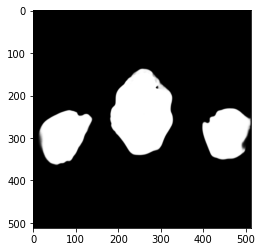

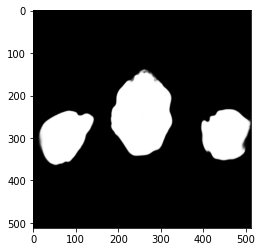

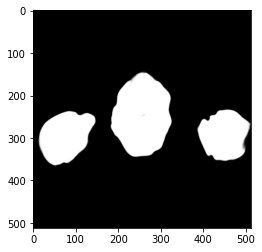

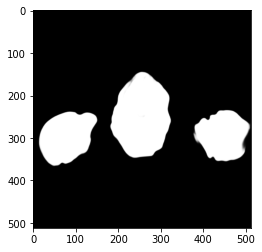

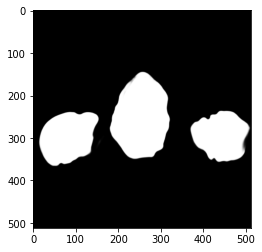

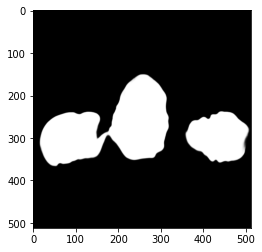

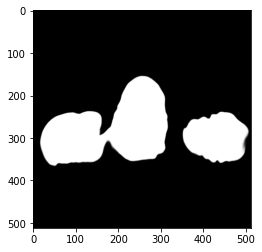

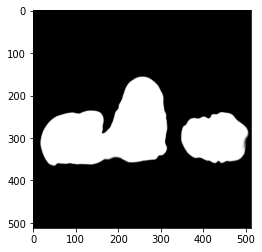

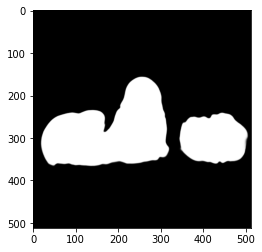

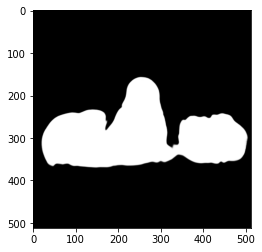

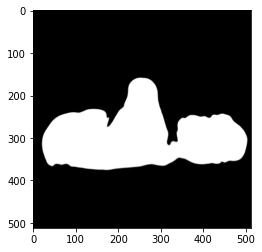

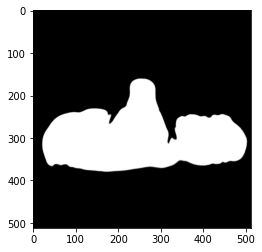

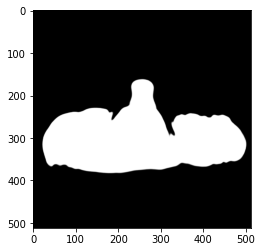

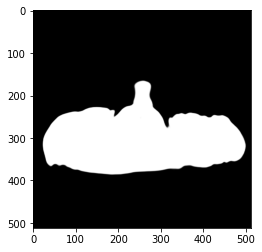

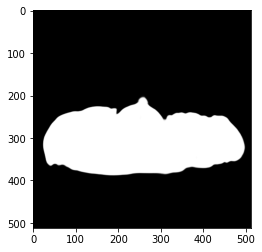

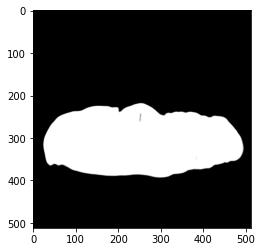

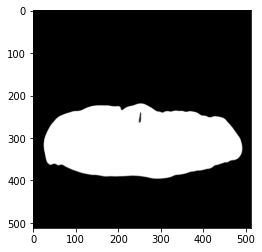

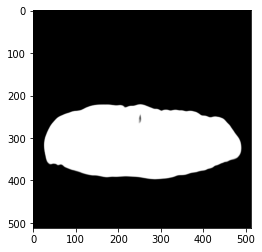

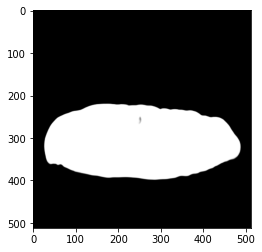

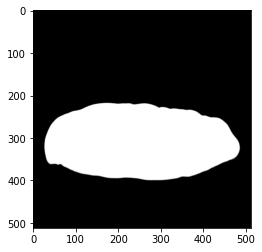

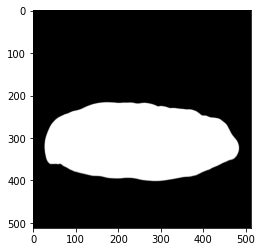

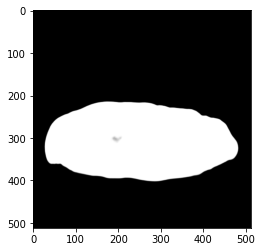

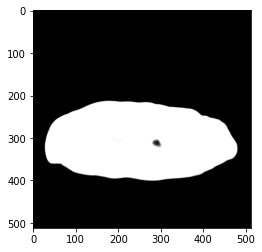

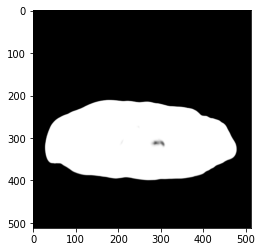

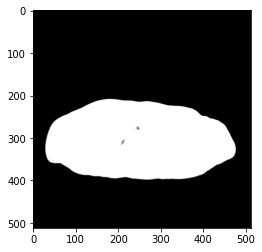

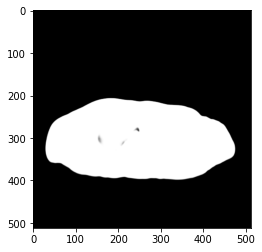

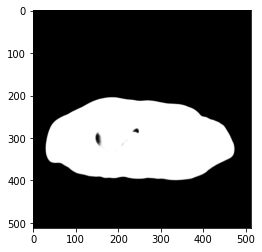

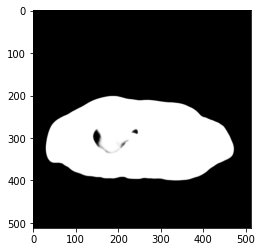

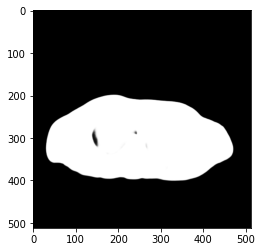

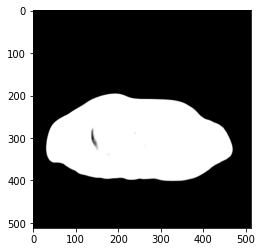

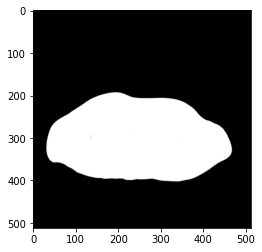

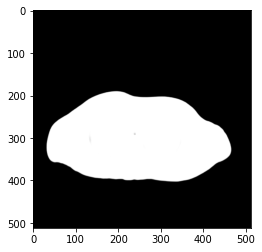

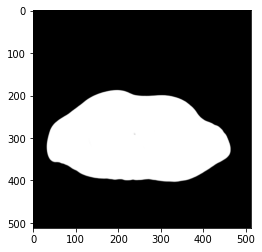

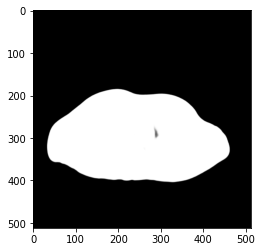

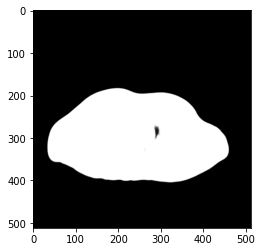

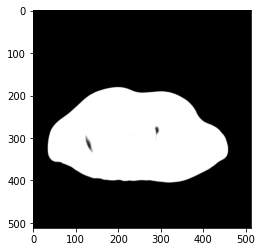

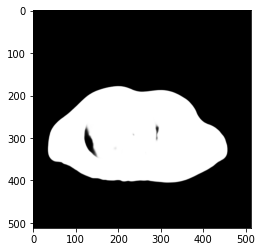

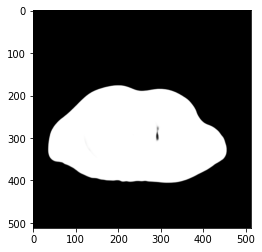

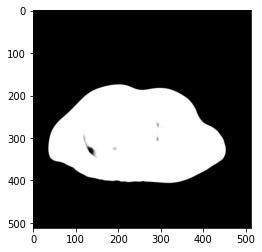

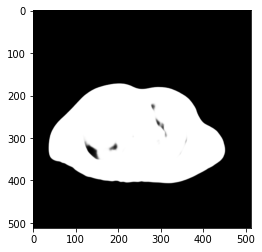

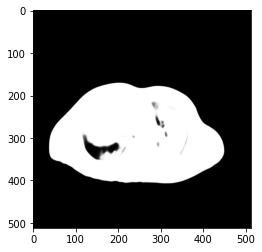

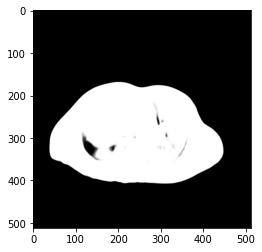

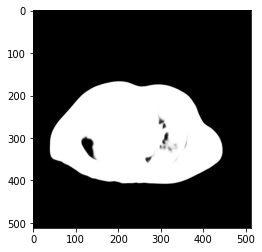

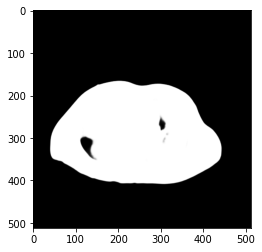

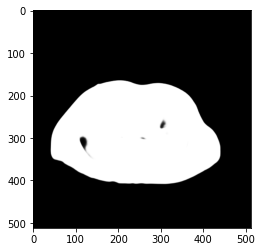

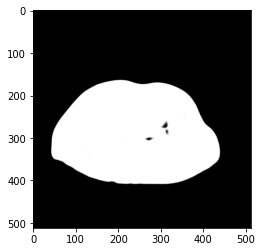

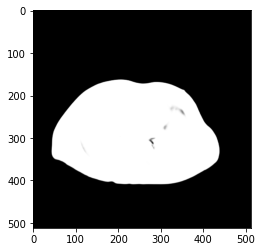

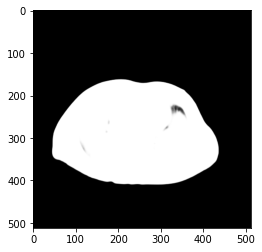

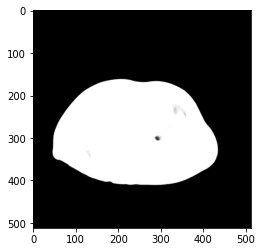

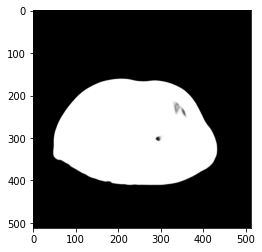

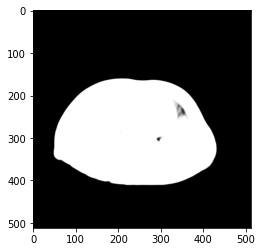

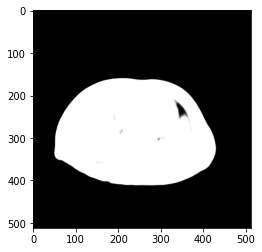

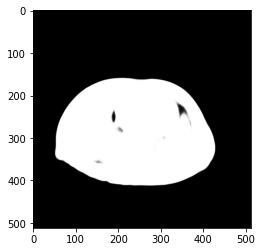

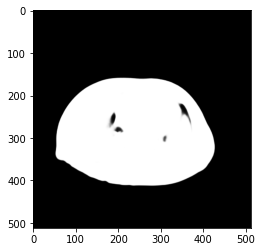

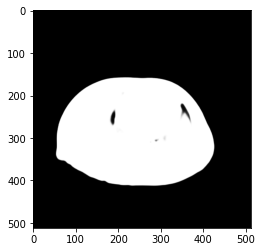

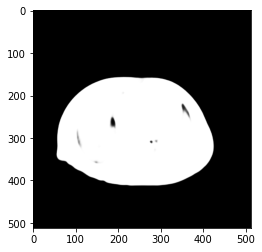

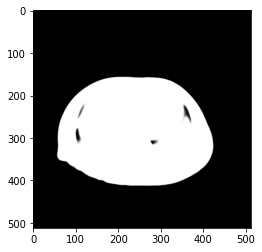

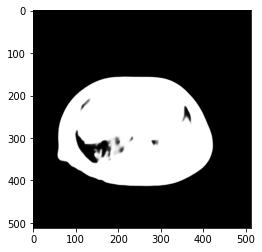

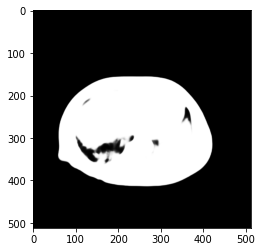

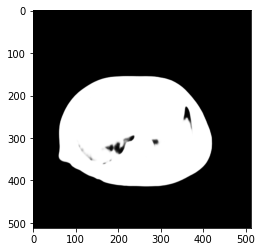

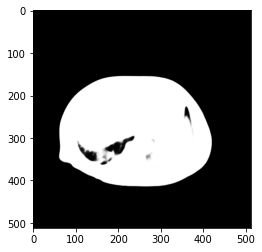

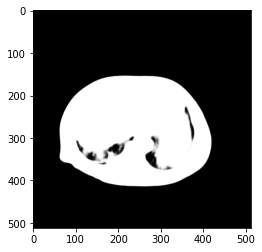

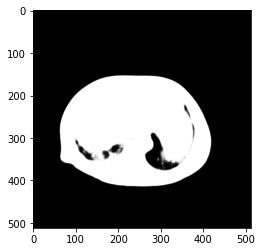

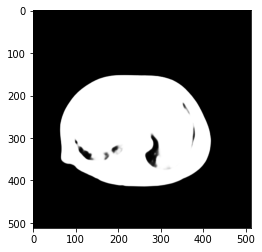

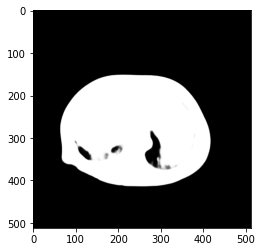

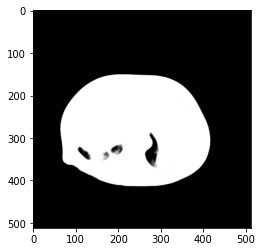

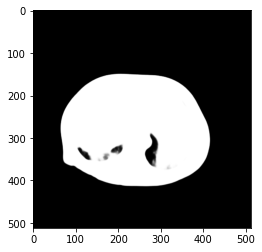

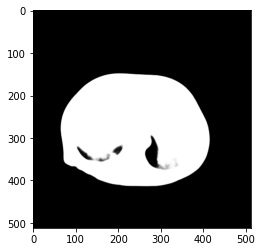

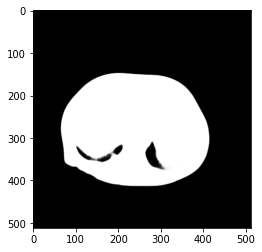

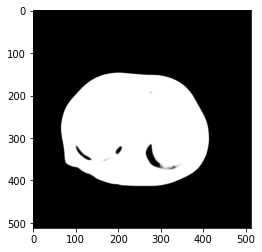

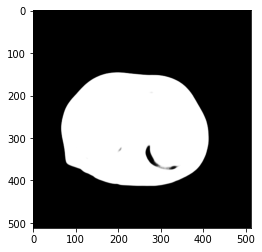

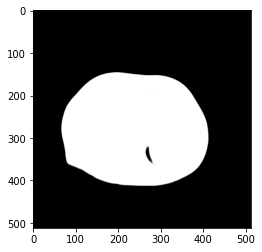

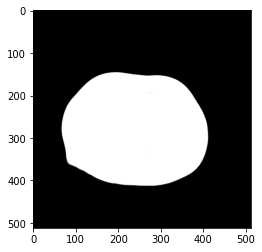

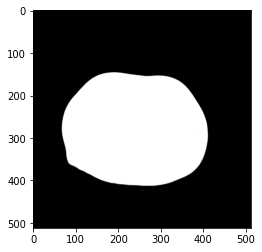

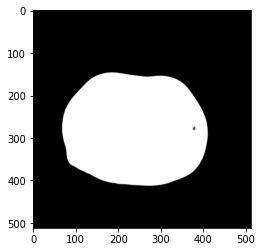

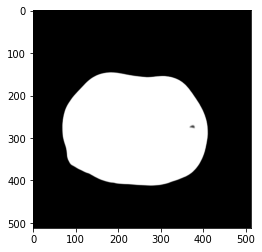

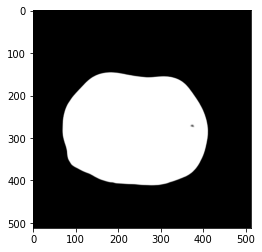

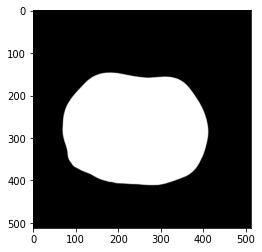

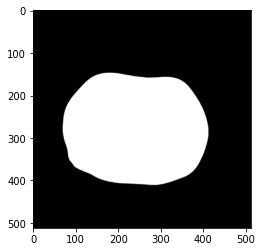

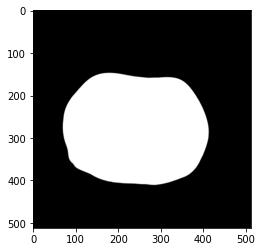

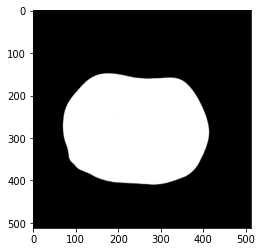

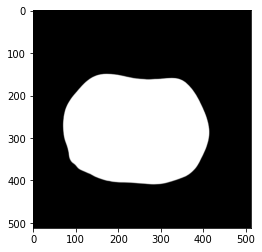

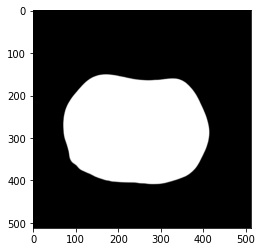

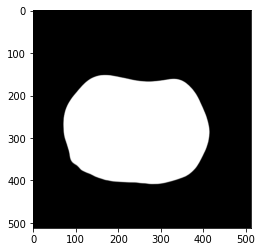

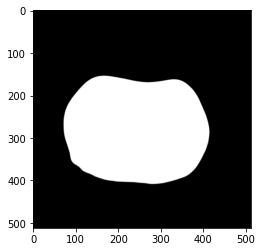

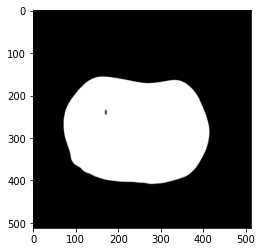

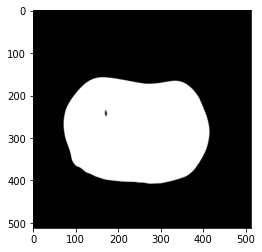

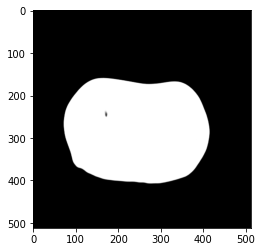

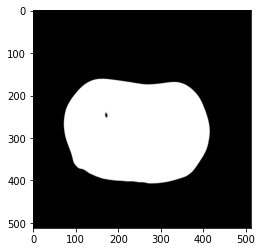

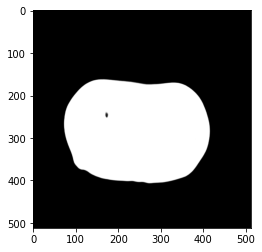

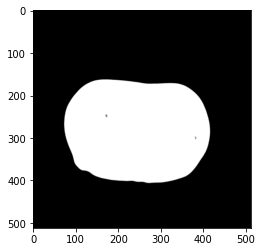

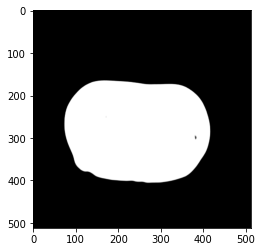

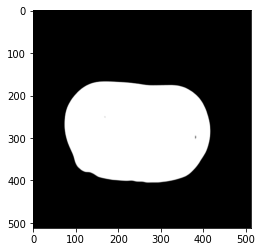

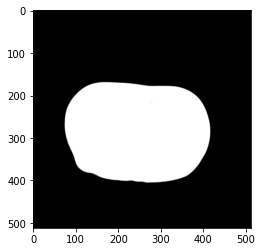

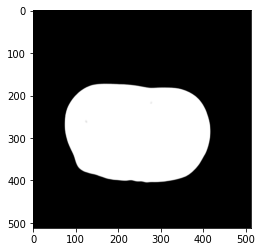

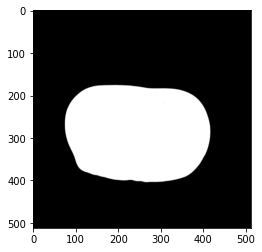

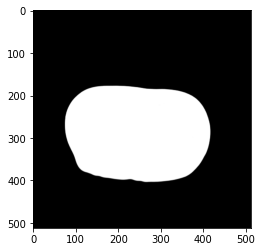

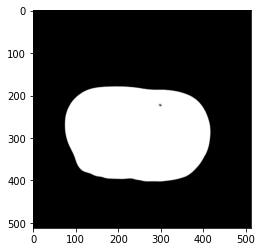

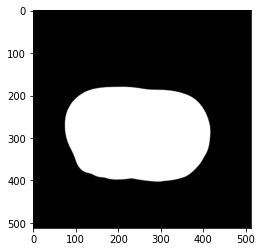

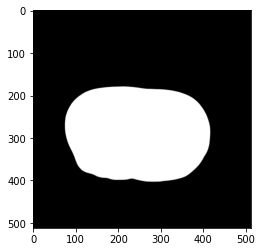

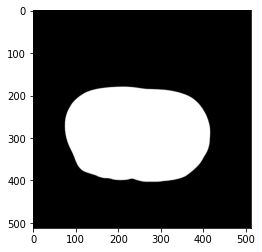

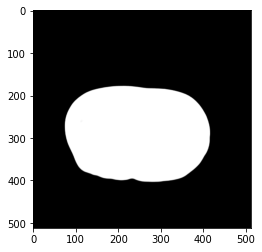

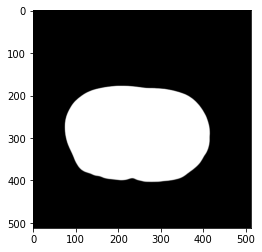

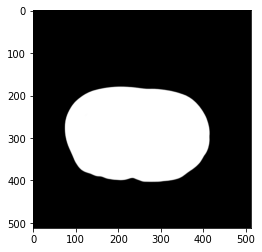

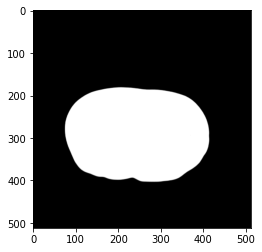

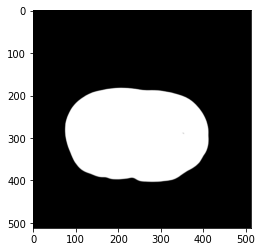

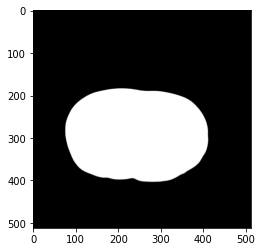

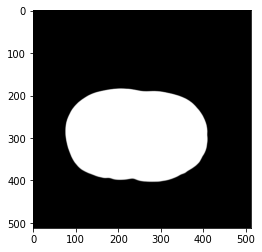

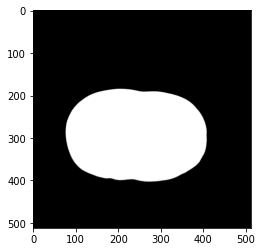

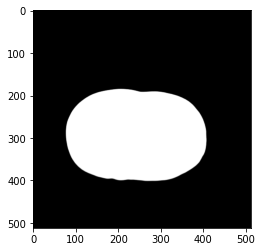

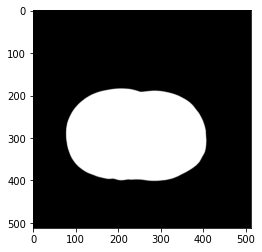

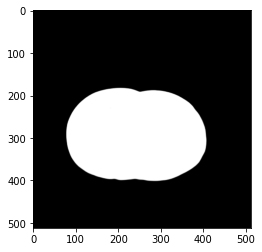

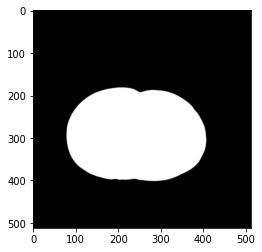

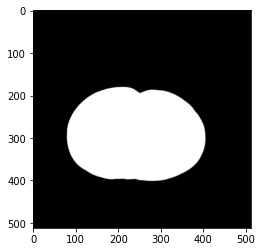

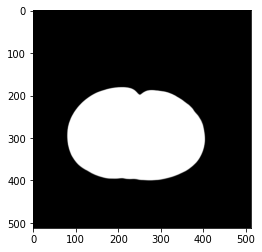

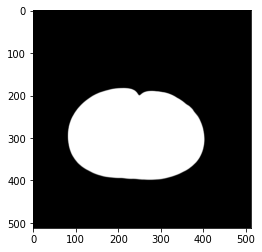

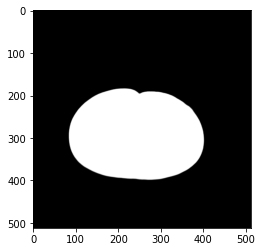

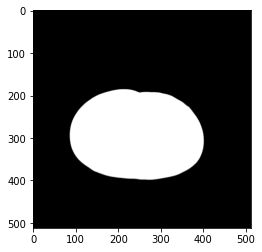

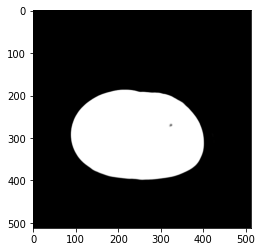

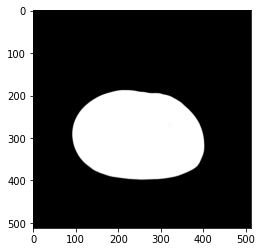

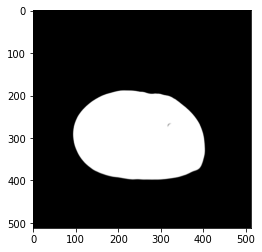

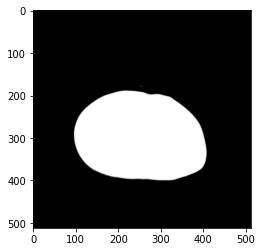

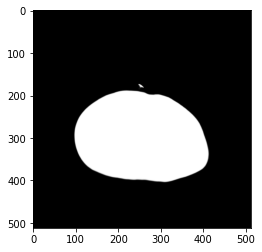

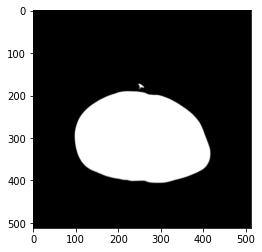

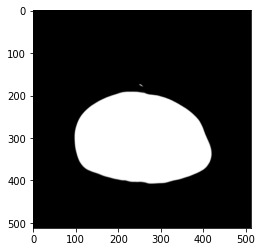

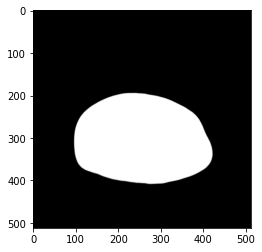

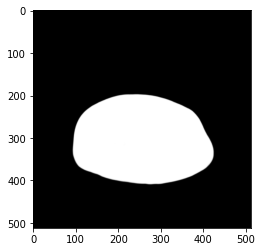

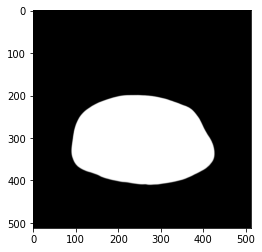

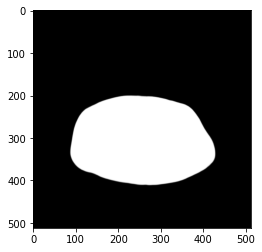

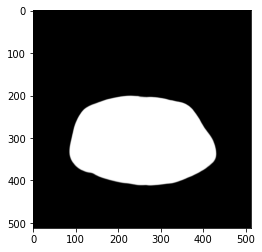

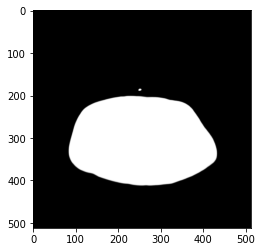

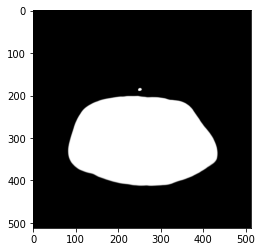

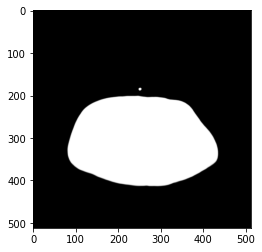

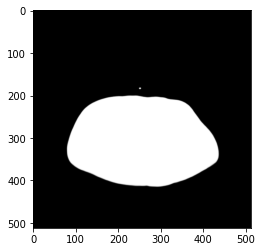

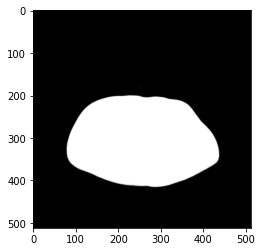

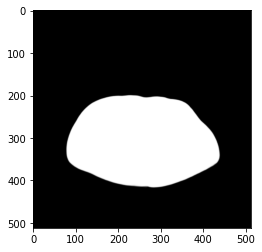

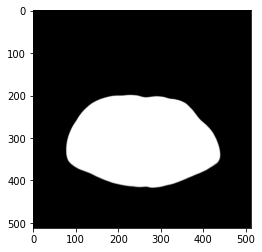

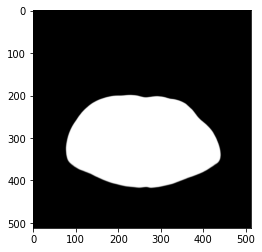

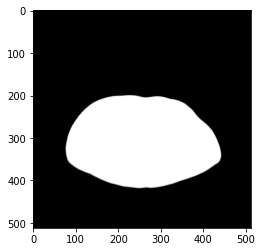

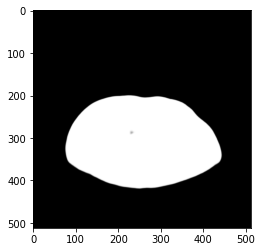

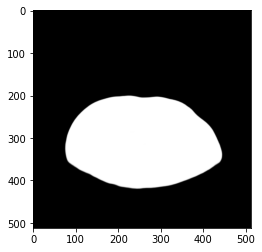

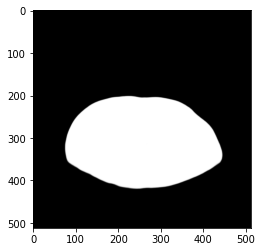

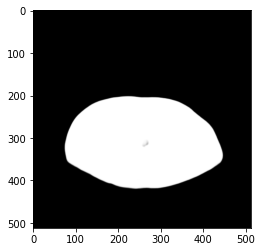

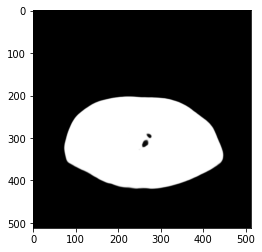

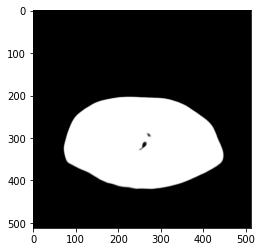

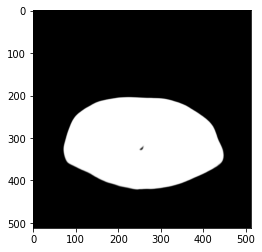

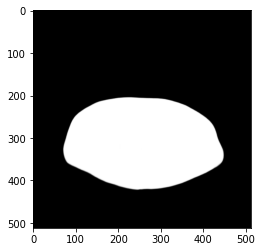

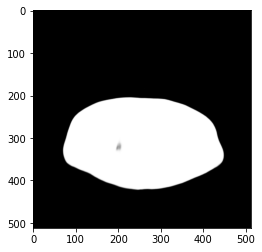

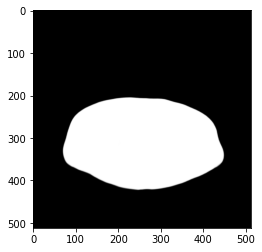

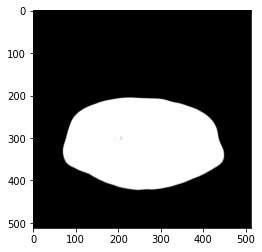

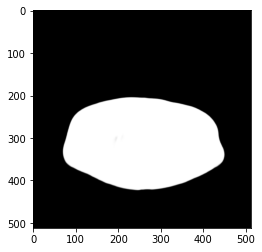

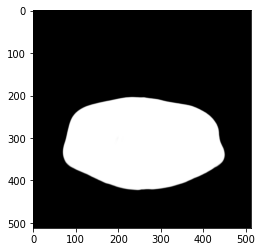

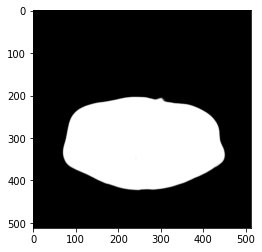

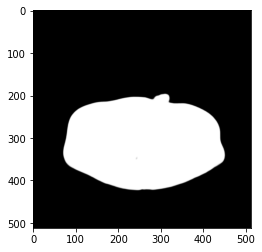

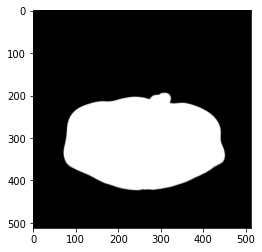

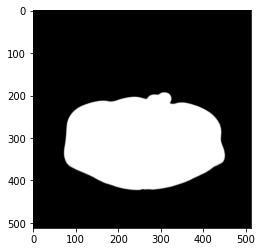

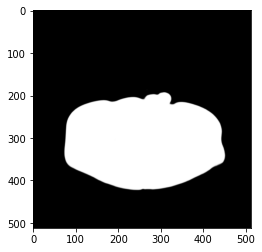

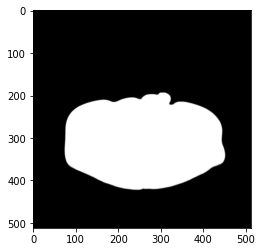

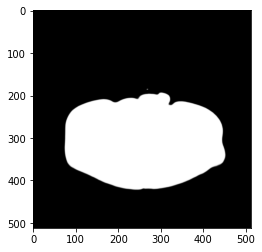

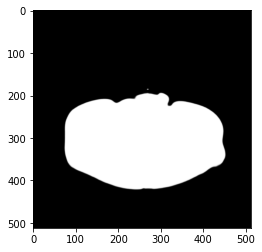

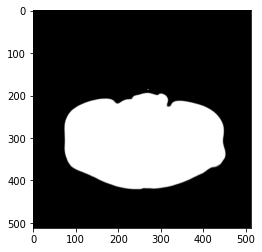

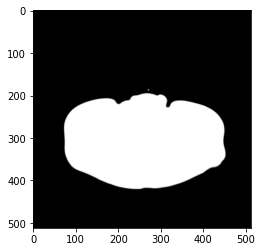

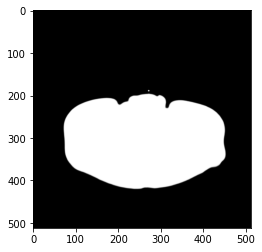

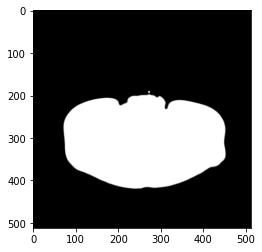

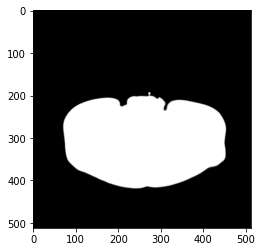

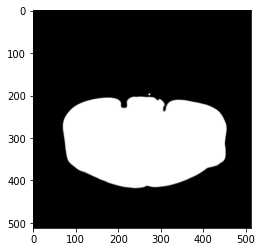

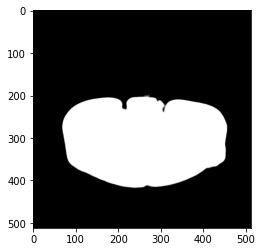

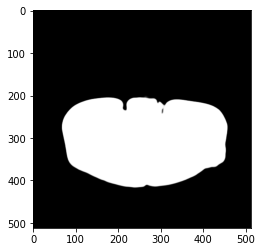

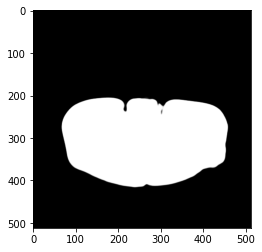

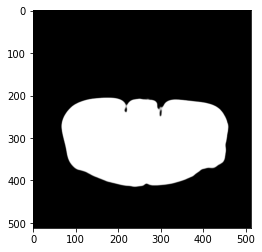

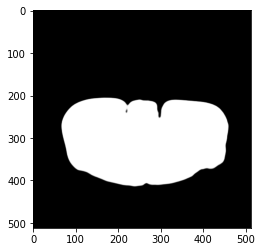

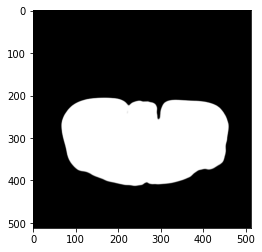

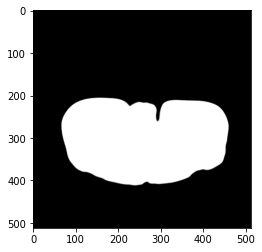

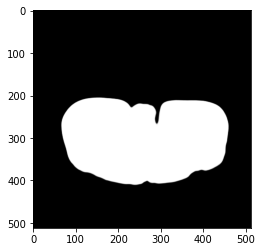

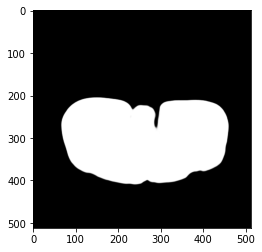

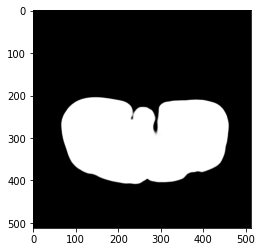

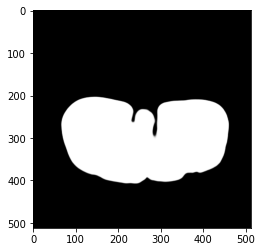

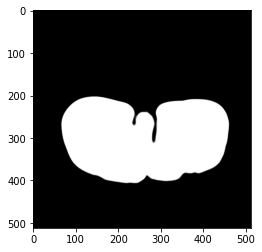

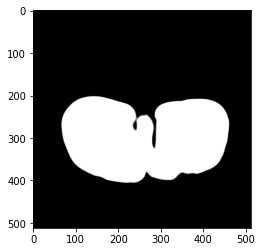

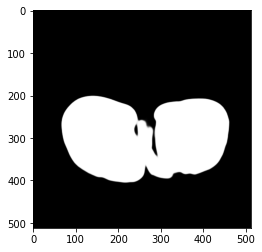

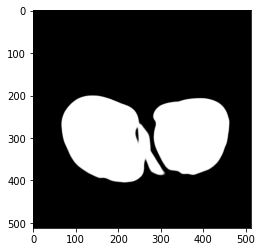

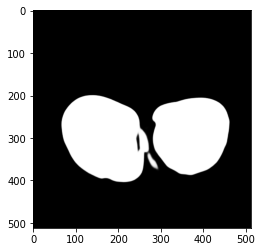

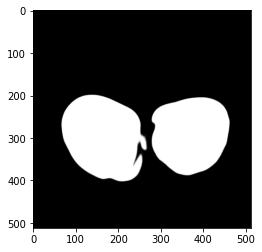

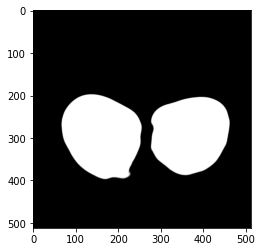

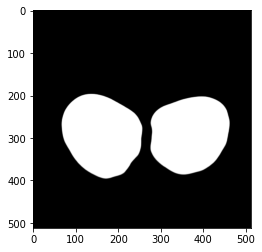

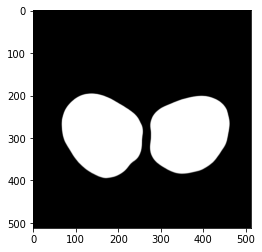

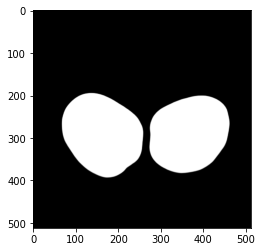

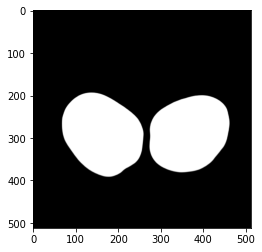

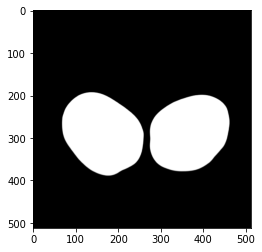

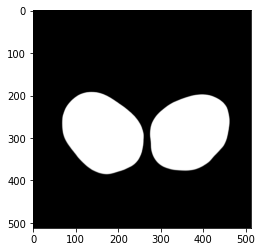

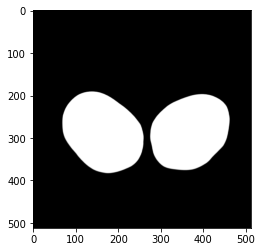

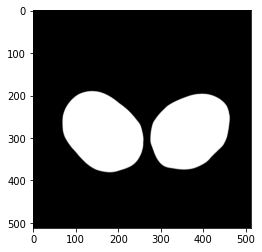

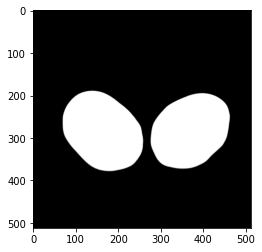

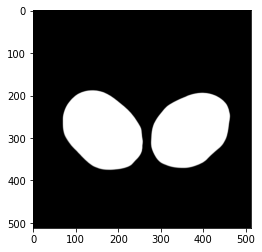

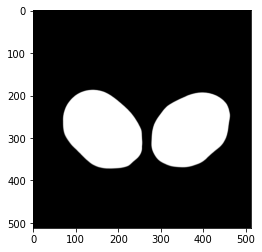

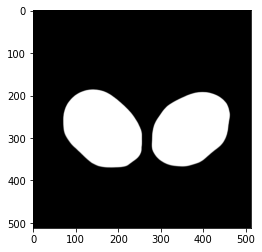

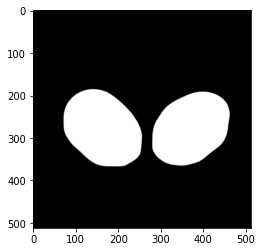

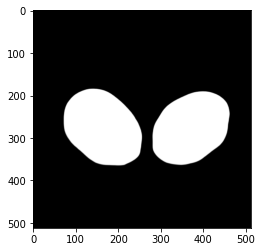

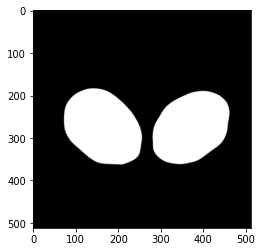

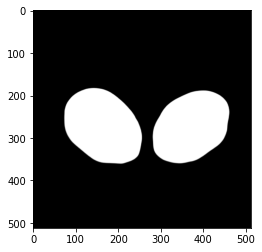

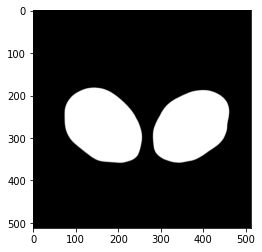

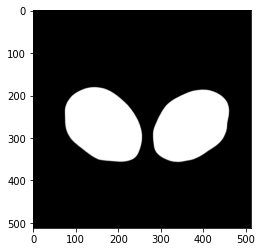

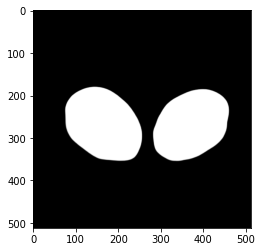

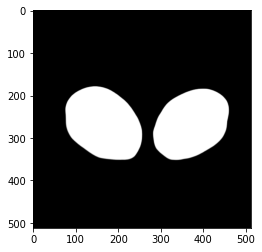

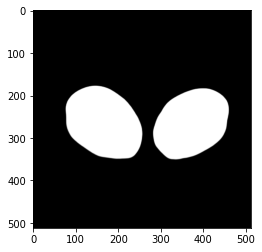

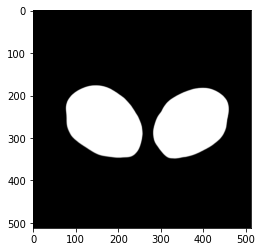

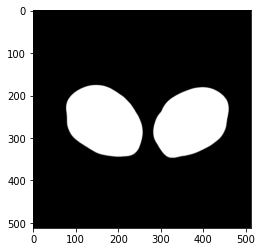

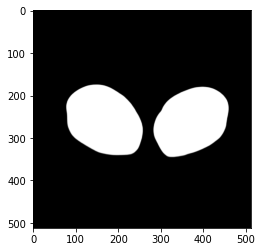

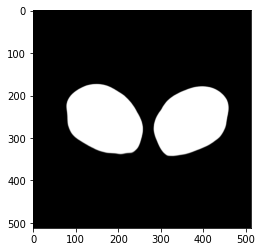

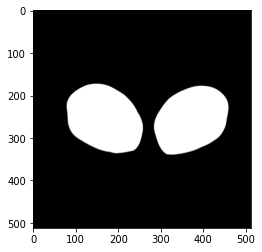

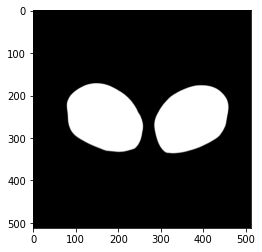

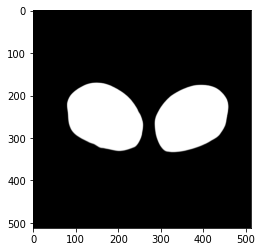

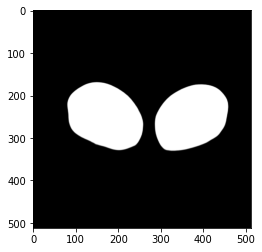

In [ ]:
for elem in plt_imgs:
    plt.imshow(elem, cmap='gray')
    plt.show()
    plt.close()